In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten

In [2]:
df  = sns.load_dataset('titanic')
df.sample(8)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
649,1,3,female,23.0,0,0,7.5500,S,Third,woman,False,NaN,Southampton,yes,True
515,0,1,male,47.0,0,0,34.0208,S,First,man,True,D,Southampton,no,True
21,1,2,male,34.0,0,0,13.0000,S,Second,man,True,D,Southampton,yes,True
677,1,3,female,18.0,0,0,9.8417,S,Third,woman,False,NaN,Southampton,yes,True
316,1,2,female,24.0,1,0,26.0000,S,Second,woman,False,NaN,Southampton,yes,False
360,0,3,male,40.0,1,4,27.9000,S,Third,man,True,NaN,Southampton,no,False
202,0,3,male,34.0,0,0,6.4958,S,Third,man,True,NaN,Southampton,no,True
381,1,3,female,1.0,0,2,15.7417,C,Third,child,False,NaN,Cherbourg,yes,False


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [4]:
df.duplicated().sum()

107

In [5]:
df.drop(columns=["deck","alive"],inplace=True)

In [6]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,Southampton,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,Southampton,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,Southampton,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,Cherbourg,True


In [7]:
df['age'].isnull().sum()

177

In [8]:
df['age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: age, dtype: float64

In [9]:
df['age']=df['age'].fillna(df['age'].mean())

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  889 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [11]:
df['embark_town'].isnull().sum()

2

In [12]:
df['embark_town'].mode()

0    Southampton
Name: embark_town, dtype: object

In [13]:
df['embark_town'].unique()

array(['Southampton', 'Cherbourg', 'Queenstown', nan], dtype=object)

In [14]:
df['embark_town']=df['embark_town'].fillna('Southampton')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          891 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  embark_town  891 non-null    object  
 12  alone        891 non-null    bool    
dtypes: bool(2), category(1), float64(2), int64(4), object(4)
memory usage: 72.5+ KB


In [16]:
from sklearn.preprocessing import LabelEncoder


In [17]:
encoder  = LabelEncoder()

In [18]:
df['sex']=encoder.fit_transform(df['sex'])
df['class']=encoder.fit_transform(df['class'])
df['who']=encoder.fit_transform(df['who'])
df['adult_male']=encoder.fit_transform(df['adult_male'])
df['embark_town']=encoder.fit_transform(df['embark_town'])
df['alone']=encoder.fit_transform(df['alone'])
df['embarked']=encoder.fit_transform(df['embarked'])



In [19]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0
1,1,1,0,38.000000,1,0,71.2833,0,0,2,0,0,0
2,1,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1
3,1,1,0,35.000000,1,0,53.1000,2,0,2,0,2,0
4,0,3,1,35.000000,0,0,8.0500,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,1,1,1,2,1
887,1,1,0,19.000000,0,0,30.0000,2,0,2,0,2,1
888,0,3,0,29.699118,1,2,23.4500,2,2,2,0,2,0
889,1,1,1,26.000000,0,0,30.0000,0,0,1,1,0,1


In [20]:
y = df['survived']
X = df.drop(columns=['survived'])
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [21]:
X

,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alone
0,3,1,22.000000,1,0,7.2500,2,2,1,1,2,0
1,1,0,38.000000,1,0,71.2833,0,0,2,0,0,0
2,3,0,26.000000,0,0,7.9250,2,2,2,0,2,1
3,1,0,35.000000,1,0,53.1000,2,0,2,0,2,0
4,3,1,35.000000,0,0,8.0500,2,2,1,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,2,1,1,1,2,1
887,1,0,19.000000,0,0,30.0000,2,0,2,0,2,1
888,3,0,29.699118,1,2,23.4500,2,2,2,0,2,0
889,1,1,26.000000,0,0,30.0000,0,0,1,1,0,1


In [22]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler  =  StandardScaler()

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
X_train = scaler.fit_transform(X_train)

In [41]:
X_train

array([[-1.61413602,  0.7243102 ,  1.22920747, ...,  0.80507649,
         0.5635246 ,  0.81220297],
       [-0.40055118,  0.7243102 , -0.50350514, ...,  0.80507649,
         0.5635246 ,  0.81220297],
       [ 0.81303367,  0.7243102 ,  0.18957991, ...,  0.80507649,
         0.5635246 ,  0.81220297],
       ...,
       [ 0.81303367,  0.7243102 ,  0.88266495, ...,  0.80507649,
         0.5635246 , -1.23121934],
       [-1.61413602, -1.38062393, -1.19659018, ..., -1.24211801,
         0.5635246 , -1.23121934],
       [-1.61413602,  0.7243102 , -0.65752403, ...,  0.80507649,
         0.5635246 , -1.23121934]])

In [42]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.88742288,  0.79200551, -0.04918352, ...,  0.83950099,
        -1.6733638 , -1.23333968],
       [-0.25537349,  0.79200551,  0.05079242, ...,  0.83950099,
         0.67590773,  0.81080664],
       [ 0.88742288,  0.79200551, -0.79458411, ...,  0.83950099,
         0.67590773,  0.81080664],
       ...,
       [ 0.88742288, -1.26261748,  0.58875931, ..., -1.19118383,
         0.67590773, -1.23333968],
       [-0.25537349, -1.26261748, -1.02514134, ..., -1.19118383,
         0.67590773,  0.81080664],
       [ 0.88742288, -1.26261748, -2.0242227 , ..., -1.19118383,
         0.67590773, -1.23333968]])

In [43]:
X_train.shape

(712, 12)

In [44]:
model  = Sequential()

In [45]:
model.add(Dense(128,activation='relu',input_dim=12))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


c:\Users\DELL\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:85: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [46]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 128)            │         1,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,985 (39.00 KB)

 Trainable params: 9,985 (39.00 KB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer="Adam",loss='binary_crossentropy',metrics=['accuracy'])

In [48]:
history=model.fit(X_train,y_train,epochs=20,validation_split=0.2)

Epoch 1/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.6721 - loss: 0.6362 - val_accuracy: 0.8252 - val_loss: 0.4264
Epoch 2/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8219 - loss: 0.4602 - val_accuracy: 0.8322 - val_loss: 0.3801
Epoch 3/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8154 - loss: 0.4133 - val_accuracy: 0.8392 - val_loss: 0.3666
Epoch 4/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8183 - loss: 0.4156 - val_accuracy: 0.8322 - val_loss: 0.3739
Epoch 5/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8377 - loss: 0.4031 - val_accuracy: 0.8322 - val_loss: 0.3633
Epoch 6/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8532 - loss: 0.3715 - val_accuracy: 0.8392 - val_loss: 0.3697
Epoch 7/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8320 - loss: 0.4026 - val_accuracy: 0.8462 - val_loss: 0.3686
Epoch 8/20
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8500 - loss: 0.3772 - val_accuracy: 0.8322 - val_loss

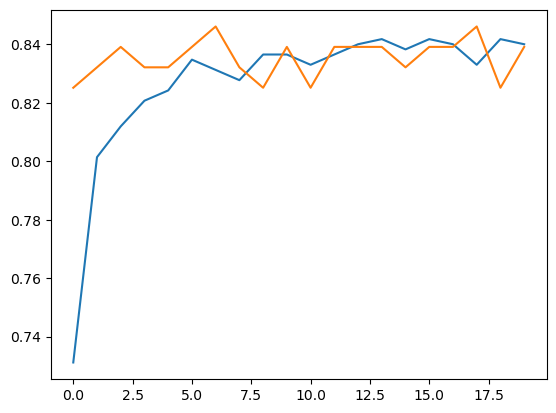

In [49]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [50]:
from sklearn.metrics import accuracy_score


In [51]:
y_prid  = model.predict(X_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step 


In [52]:
y_prid = np.where(y_prid>0.5,1,0)

In [53]:
y_prid

array([[0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [1],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [1],
    

In [54]:
accuracy_score(y_test,y_prid)

0.8100558659217877